## Analysising collision data from The Plain

Data source: https://bikedata.cyclestreets.net

In [95]:
import datetime
import json
import pathlib

import geopandas
import geopy.distance
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

In [19]:
data_path = pathlib.Path.cwd().parent.joinpath("data/collisions_the_plain.csv")

In [20]:
df = pd.read_csv(data_path)
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

In [21]:
df.head()

Accident Index           Timestamp severity Casualties  \
0  2019430024462 2019-01-22 06:15:00  serious    Cyclist   
1  2019430142429 2019-05-08 13:00:00  serious    Cyclist   
2  2019430171180 2019-06-05 06:40:00  serious    Cyclist   
3  2019430196548 2019-06-28 11:00:00  serious    Cyclist   
4  2019430287225 2019-08-17 22:45:00  serious    Cyclist   

   Number of Casualties  Number of Vehicles  \
0                     1                   2   
1                     1                   2   
2                     1                   2   
3                     1                   2   
4                     1                   2   

                                                 url  \
0  https://www.cyclestreets.net/collisions/report...   
1  https://www.cyclestreets.net/collisions/report...   
2  https://www.cyclestreets.net/collisions/report...   
3  https://www.cyclestreets.net/collisions/report...   
4  https://www.cyclestreets.net/collisions/report...   

                                              apiUrl   Latitude  Longitude  
0  https://api.cyclestreets.net/v2/collisions.loc...  51.749909  -1.244002  
1  https://api.cyclestreets.net/v2/collisions.loc...  51.750333  -1.244328  
2  https://api.cyclestreets.net/v2/collisions.loc...  51.749909  -1.244002  
3  https://api.cyclestreets.net/v2/collisions.loc...  51.749928  -1.244147  
4  https://api.cyclestreets.net/v2/collisions.loc...  51.749918  -1.244017

In [22]:
df["Timestamp"].dt.time

0      06:15:00
1      13:00:00
2      06:40:00
3      11:00:00
4      22:45:00
         ...   
201    07:30:00
202    16:30:00
203    07:15:00
204    19:13:00
205    19:20:00
Name: Timestamp, Length: 206, dtype: object

## Location of The Plain

From Open Street Map: https://www.openstreetmap.org/search?whereami=1&query=51.75012%2C-1.24414#map=19/51.75012/-1.24414
From Google Maps: https://www.google.com/maps/place/51%C2%B045'00.3%22N+1%C2%B014'38.7%22W/@51.750094,-1.2446402,19z/data=!3m1!4b1!4m6!3m5!1s0x0:0xd90a8e7755b1d0de!7e2!8m2!3d51.7500937!4d-1.2440932

From https://www.mapdevelopers.com/draw-circle-tool.php I think a radius of 40m around the centre of the roundabout is "the junction" for our purposes, see [here](https://www.mapdevelopers.com/draw-circle-tool.php?circles=%5B%5B41.27%2C51.7500857%2C-1.2440797%2C%22%23AAAAAA%22%2C%22%23000000%22%2C0.4%5D%2C%5B40%2C51.7191343%2C-1.2446295%2C%22%23AAAAAA%22%2C%22%23000000%22%2C0.4%5D%5D). Will potentially update this if e.g. there are a cluster of clearly The Plain related crashes we're missing. 

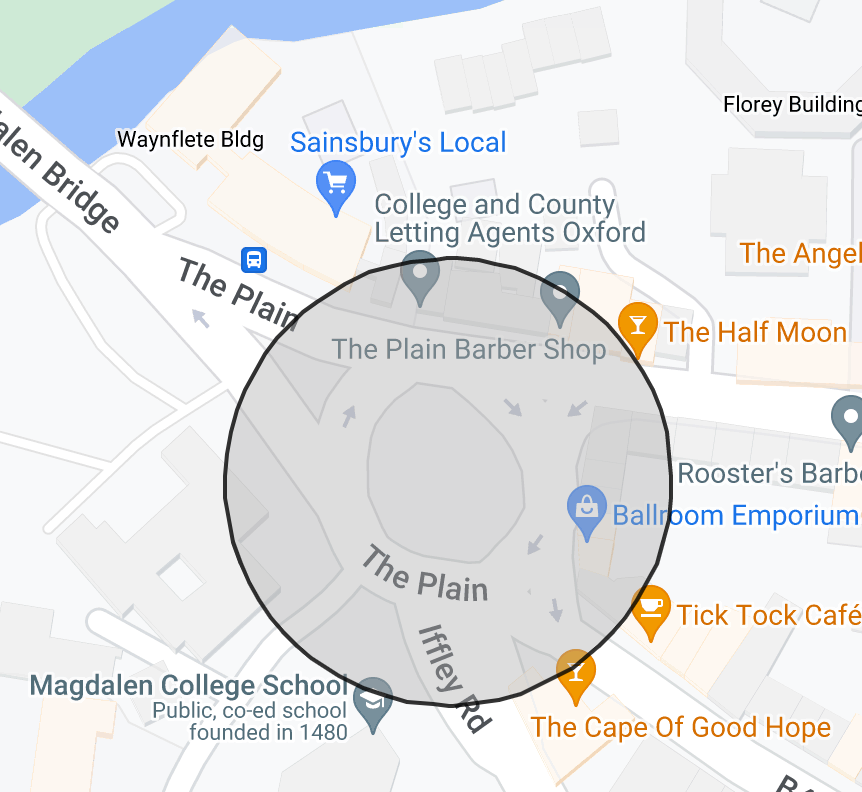

In [23]:
def inside_plain(latitude: float, longitude: float, radius_metres: float = 25) -> bool:
    """Whether a coordinate is inside our boundary for The Plain roundabout"""
    plain_latitude = 51.75012
    plain_longitude = -1.24414
    return (
        geopy.distance.geodesic(
            (plain_latitude, plain_longitude), (latitude, longitude)
        ).m
        < radius_metres
    )


inside_plain(51.749909, -1.244002)

False

In [24]:
df["inside_plain"] = df.apply(
    lambda x: inside_plain(x["Latitude"], x["Longitude"]), axis=1
)

In [25]:
df

Accident Index           Timestamp severity Casualties  \
0    2019430024462 2019-01-22 06:15:00  serious    Cyclist   
1    2019430142429 2019-05-08 13:00:00  serious    Cyclist   
2    2019430171180 2019-06-05 06:40:00  serious    Cyclist   
3    2019430196548 2019-06-28 11:00:00  serious    Cyclist   
4    2019430287225 2019-08-17 22:45:00  serious    Cyclist   
..             ...                 ...      ...        ...   
201  200043P370080 2000-08-24 07:30:00   slight    Cyclist   
202  199943P022129 1999-12-03 16:30:00   slight    Cyclist   
203  199943P137029 1999-02-15 07:15:00   slight    Cyclist   
204  199943P200029 1999-02-17 19:13:00   slight    Cyclist   
205  199943P201029 1999-02-17 19:20:00   slight    Cyclist   

     Number of Casualties  Number of Vehicles  \
0                       1                   2   
1                       1                   2   
2                       1                   2   
3                       1                   2   
4                       1                   2   
..                    ...                 ...   
201                     1                   2   
202                     1                   2   
203                     1                   2   
204                     1                   2   
205                     1                   2   

                                                   url  \
0    https://www.cyclestreets.net/collisions/report...   
1    https://www.cyclestreets.net/collisions/report...   
2    https://www.cyclestreets.net/collisions/report...   
3    https://www.cyclestreets.net/collisions/report...   
4    https://www.cyclestreets.net/collisions/report...   
..                                                 ...   
201  https://www.cyclestreets.net/collisions/report...   
202  https://www.cyclestreets.net/collisions/report...   
203  https://www.cyclestreets.net/collisions/report...   
204  https://www.cyclestreets.net/collisions/report...   
205  https://www.cyclestreets.net/collisions/report...   

                                                apiUrl   Latitude  Longitude  \
0    https://api.cyclestreets.net/v2/collisions.loc...  51.749909  -1.244002   
1    https://api.cyclestreets.net/v2/collisions.loc...  51.750333  -1.244328   
2    https://api.cyclestreets.net/v2/collisions.loc...  51.749909  -1.244002   
3    https://api.cyclestreets.net/v2/collisions.loc...  51.749928  -1.244147   
4    https://api.cyclestreets.net/v2/collisions.loc...  51.749918  -1.244017   
..                                                 ...        ...        ...   
201  https://api.cyclestreets.net/v2/collisions.loc...  51.749858  -1.244238   
202  https://api.cyclestreets.net/v2/collisions.loc...  51.750124  -1.243655   
203  https://api.cyclestreets.net/v2/collisions.loc...  51.749767  -1.243950   
204  https://api.cyclestreets.net/v2/collisions.loc...  51.749856  -1.243949   
205  https://api.cyclestreets.net/v2/collisions.loc...  51.749856  -1.243949   

     inside_plain  
0           False  
1           False  
2           False  
3            True  
4            True  
..            ...  
201         False  
202         False  
203         False  
204         False  
205         False  

[206 rows x 11 columns]

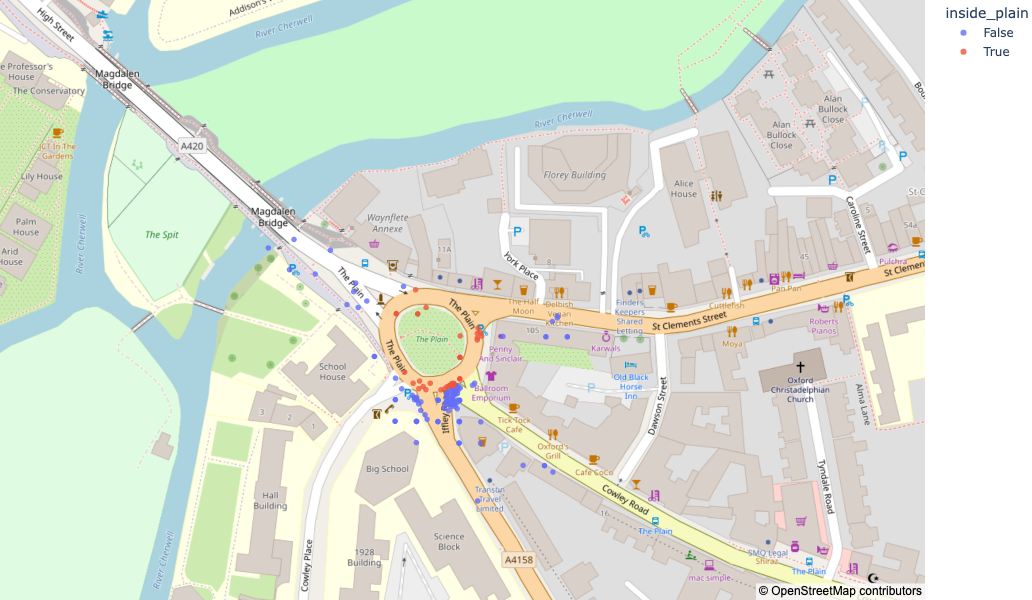

In [26]:
def plot_plain(df):
    fig = px.scatter_mapbox(
        df.fillna(0),
        lat="Latitude",
        lon="Longitude",
        color="inside_plain",
        color_continuous_scale="Viridis",
        opacity=0.8,
        zoom=17,
        height=600,
        width=1000,
    )
    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
    fig.show()


plot_plain(df)

OK 25 metre diameter isn't quite right so let's push it out to 30m

In [27]:
df["inside_plain"] = df.apply(
    lambda x: inside_plain(x["Latitude"], x["Longitude"], radius_metres=30), axis=1
)

In [28]:
df.head()

Accident Index           Timestamp severity Casualties  \
0  2019430024462 2019-01-22 06:15:00  serious    Cyclist   
1  2019430142429 2019-05-08 13:00:00  serious    Cyclist   
2  2019430171180 2019-06-05 06:40:00  serious    Cyclist   
3  2019430196548 2019-06-28 11:00:00  serious    Cyclist   
4  2019430287225 2019-08-17 22:45:00  serious    Cyclist   

   Number of Casualties  Number of Vehicles  \
0                     1                   2   
1                     1                   2   
2                     1                   2   
3                     1                   2   
4                     1                   2   

                                                 url  \
0  https://www.cyclestreets.net/collisions/report...   
1  https://www.cyclestreets.net/collisions/report...   
2  https://www.cyclestreets.net/collisions/report...   
3  https://www.cyclestreets.net/collisions/report...   
4  https://www.cyclestreets.net/collisions/report...   

                                              apiUrl   Latitude  Longitude  \
0  https://api.cyclestreets.net/v2/collisions.loc...  51.749909  -1.244002   
1  https://api.cyclestreets.net/v2/collisions.loc...  51.750333  -1.244328   
2  https://api.cyclestreets.net/v2/collisions.loc...  51.749909  -1.244002   
3  https://api.cyclestreets.net/v2/collisions.loc...  51.749928  -1.244147   
4  https://api.cyclestreets.net/v2/collisions.loc...  51.749918  -1.244017   

   inside_plain  
0          True  
1          True  
2          True  
3          True  
4          True

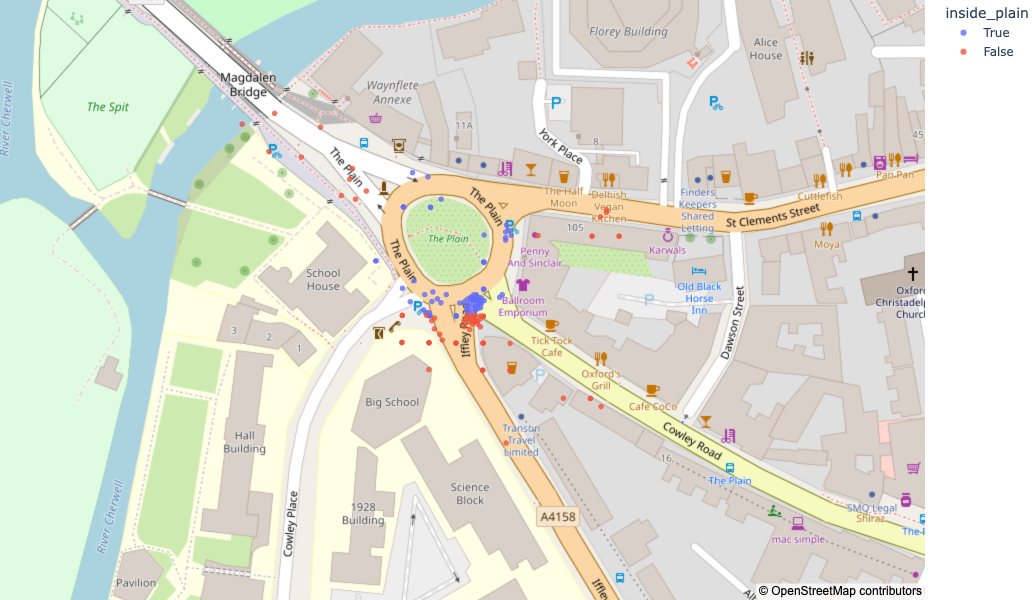

In [29]:
plot_plain(df)

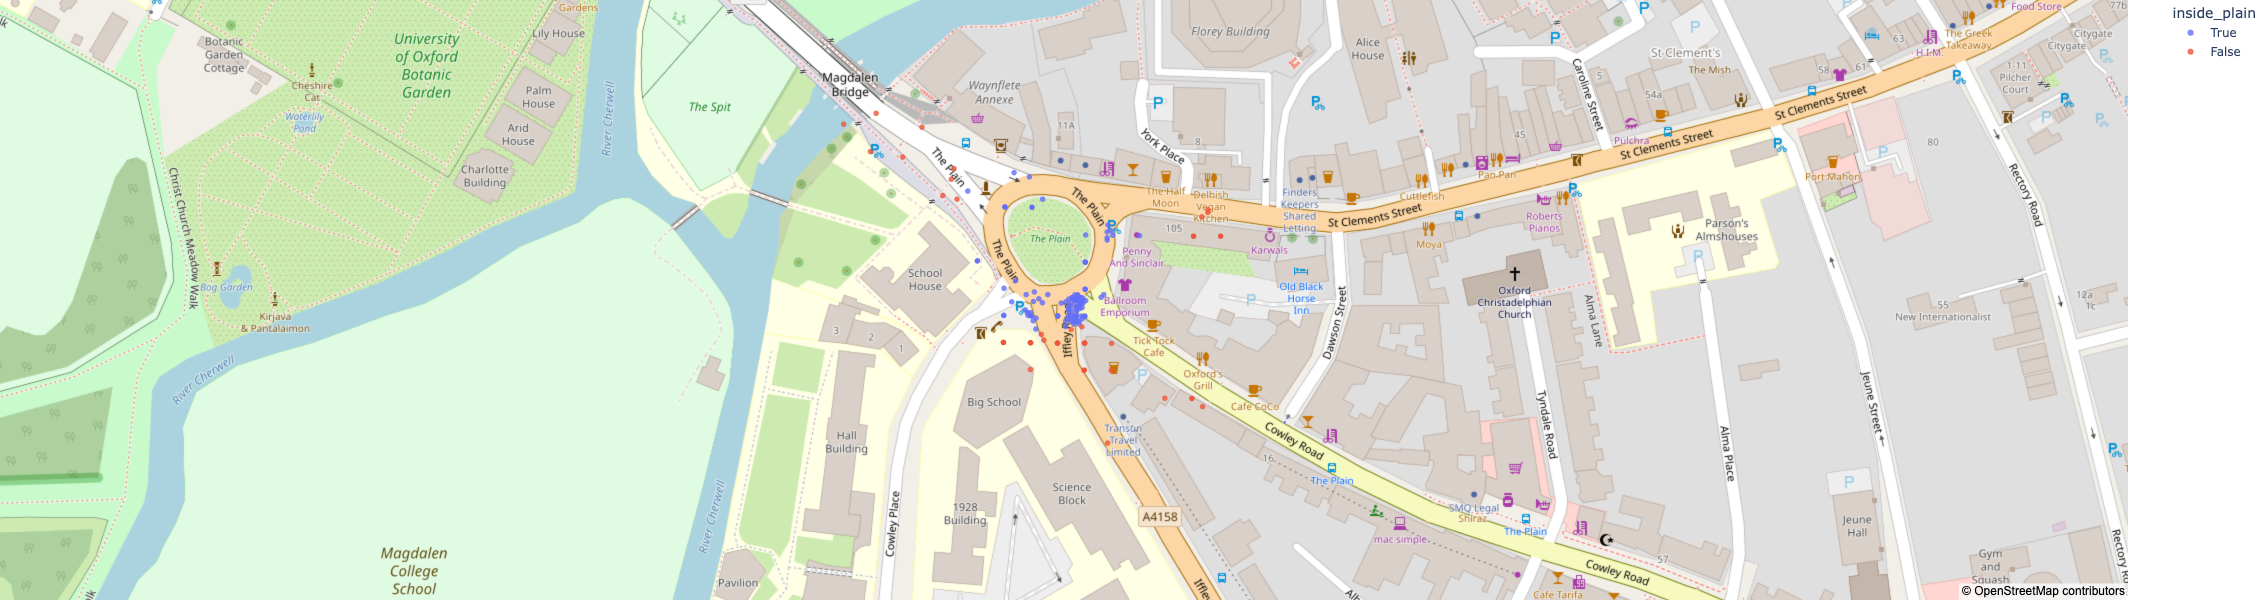

In [30]:
# Still not quite big enough, want to pick up that cluster at the Cowley Road junction
df["inside_plain"] = df.apply(
    lambda x: inside_plain(x["Latitude"], x["Longitude"], radius_metres=35), axis=1
)
plot_plain(df)

OK 35m looks good enough

## Time of day of collisions

In [31]:
df["time_of_day"] = df["Timestamp"].dt.time

In [102]:
def time_to_theta(time: datetime.time) -> float:
    return (2 * np.pi / (24 * 60 * 60)) * (
        time.hour * 3600 + time.minute * 60 + time.second
    )

In [34]:
df["theta"] = (2 * np.pi / (24 * 60 * 60)) * (
    df["Timestamp"].dt.hour * 3600
    + df["Timestamp"].dt.minute * 60
    + df["Timestamp"].dt.second
)

In [35]:
n_bins = 24 * 2
time_bins = np.linspace(0, 2 * np.pi, n_bins, endpoint=False)
labels = range(n_bins - 1)
df["time_bin"] = pd.cut(df["theta"], bins=time_bins, labels=labels)
df["time_bin_theta"] = df["time_bin"].apply(lambda x: x * 2 * np.pi / n_bins)

/var/folders/fg/w06k0nvx1w513ss83703ycf00000gn/T/ipykernel_36758/3752186910.py:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



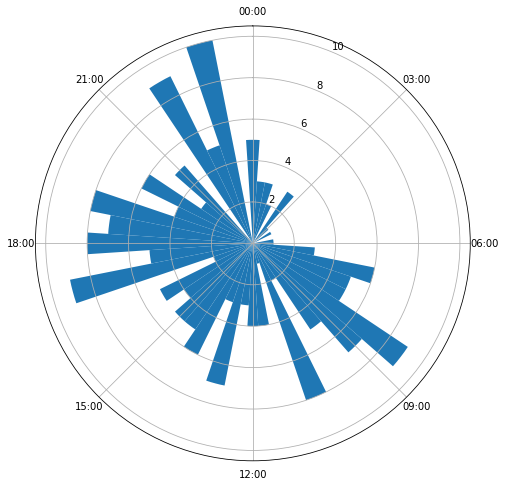

In [42]:
plt.figure(figsize=(8, 8))

width = (2 * np.pi) / n_bins
bottom = 0

ax = plt.subplot(111, polar=True)
bars = ax.bar(
    df["time_bin_theta"].value_counts().index,
    df["time_bin_theta"].value_counts().values,
    width=width,
    bottom=bottom,
)

ax.set_theta_zero_location("N")  # theta=0 at the top
ax.set_theta_direction(-1)  # theta increasing clockwise
ax.set_xticklabels(
    ["00:00", "03:00", "06:00", "09:00", "12:00", "15:00", "18:00", "21:00"]
)

plt.savefig("plain_time_of_day.png", bbox_inches="tight")
plt.show()

### Plot for cyclists only

In [41]:
df["Casualties"].value_counts()

Cyclist       193
Pedestrian     13
Name: Casualties, dtype: int64

In [44]:
df_cyclists = df.loc[df["Casualties"] == "Cyclist"]

/var/folders/fg/w06k0nvx1w513ss83703ycf00000gn/T/ipykernel_36758/1058536703.py:17: UserWarning:

FixedFormatter should only be used together with FixedLocator



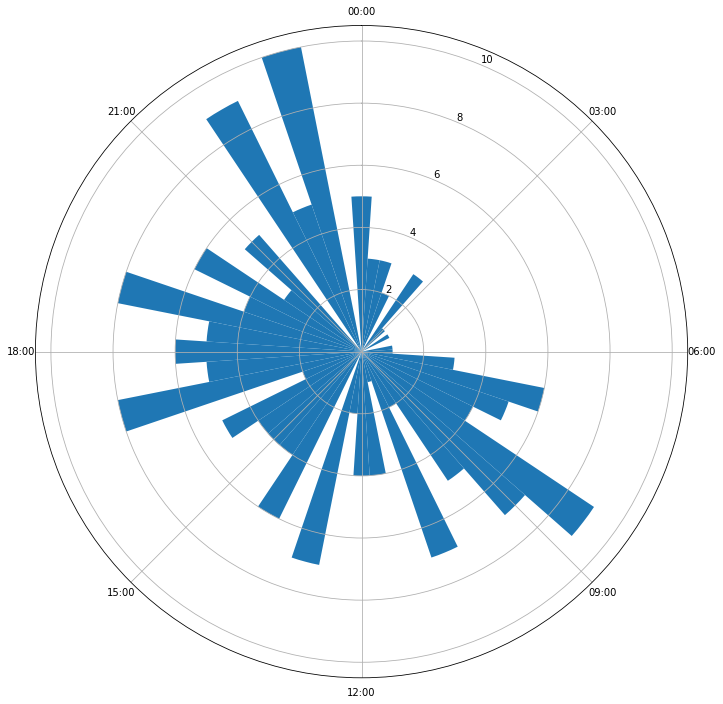

In [90]:
# Cyclists only (not much difference)
plt.figure(figsize=(12, 12))

width = (2 * np.pi) / n_bins
bottom = 0

ax = plt.subplot(111, polar=True)
bars = ax.bar(
    df_cyclists["time_bin_theta"].value_counts().index,
    df_cyclists["time_bin_theta"].value_counts().values,
    width=width,
    bottom=bottom,
)

ax.set_theta_zero_location("N")  # theta=0 at the top
ax.set_theta_direction(-1)  # theta increasing clockwise
ax.set_xticklabels(
    ["00:00", "03:00", "06:00", "09:00", "12:00", "15:00", "18:00", "21:00"]
)

plt.savefig("plain_time_of_day.png", bbox_inches="tight")
plt.show()

### Plot with dots per collision, coloured by severity

In [80]:
# Make the severity column a categorical one so we can sort by it
df_cyclists["severity"] = pd.Categorical(
    df_cyclists["severity"],
    categories=["slight", "serious"],
    ordered=True,
)

/var/folders/fg/w06k0nvx1w513ss83703ycf00000gn/T/ipykernel_36758/163995350.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
df_cyclists["time_bin_cumcount"] = df_cyclists.groupby("time_bin_theta").cumcount() + 1

/var/folders/fg/w06k0nvx1w513ss83703ycf00000gn/T/ipykernel_36758/4070449758.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [82]:
df_cyclists.head()

Accident Index           Timestamp severity Casualties  \
0  2019430024462 2019-01-22 06:15:00  serious    Cyclist   
1  2019430142429 2019-05-08 13:00:00  serious    Cyclist   
2  2019430171180 2019-06-05 06:40:00  serious    Cyclist   
3  2019430196548 2019-06-28 11:00:00  serious    Cyclist   
4  2019430287225 2019-08-17 22:45:00  serious    Cyclist   

   Number of Casualties  Number of Vehicles  \
0                     1                   2   
1                     1                   2   
2                     1                   2   
3                     1                   2   
4                     1                   2   

                                                 url  \
0  https://www.cyclestreets.net/collisions/report...   
1  https://www.cyclestreets.net/collisions/report...   
2  https://www.cyclestreets.net/collisions/report...   
3  https://www.cyclestreets.net/collisions/report...   
4  https://www.cyclestreets.net/collisions/report...   

                                              apiUrl   Latitude  Longitude  \
0  https://api.cyclestreets.net/v2/collisions.loc...  51.749909  -1.244002   
1  https://api.cyclestreets.net/v2/collisions.loc...  51.750333  -1.244328   
2  https://api.cyclestreets.net/v2/collisions.loc...  51.749909  -1.244002   
3  https://api.cyclestreets.net/v2/collisions.loc...  51.749928  -1.244147   
4  https://api.cyclestreets.net/v2/collisions.loc...  51.749918  -1.244017   

   inside_plain time_of_day     theta time_bin time_bin_theta  \
0          True    06:15:00  1.636246       12       1.570796   
1          True    13:00:00  3.403392       26       3.403392   
2          True    06:40:00  1.745329       13       1.701696   
3          True    11:00:00  2.879793       21       2.748894   
4          True    22:45:00  5.955936       45       5.890486   

   time_bin_cumcount  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1

In [86]:
for severity in df_cyclists["severity"].unique():
    print(severity)

serious
slight


In [131]:
colours = {"serious": "C1", "slight": "C0"}

fig = plt.figure(figsize=(10, 10))
# fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
ax = fig.add_subplot(projection="polar")

for severity in df_cyclists["severity"].unique():  # may need some though for sorting
    ax.scatter(
        df_cyclists.loc[df_cyclists["severity"] == severity]["time_bin_theta"],
        df_cyclists.loc[df_cyclists["severity"] == severity]["time_bin_cumcount"],
        c=colours[severity],
        label=severity,
    )

origin_offset = 2.5
ax.set_rorigin(-origin_offset)
ax.set_theta_zero_location("N")  # theta=0 at the top
ax.set_theta_direction(-1)  # theta increasing clockwise
ax.set_xticklabels(
    ["00:00", "03:00", "06:00", "09:00", "12:00", "15:00", "18:00", "21:00"]
)

# Show high street bus gate operational time (07:30 to 18:30)
ax.fill_between(
    np.linspace(
        time_to_theta(datetime.time(hour=7, minute=30)),
        time_to_theta(datetime.time(hour=18, minute=30)),
        100,
    ),
    0,
    df_cyclists["time_bin_cumcount"].max(),  # fill to maximum extent
    alpha=0.25,
    label="High Street bus gate operation",
)

ax.legend(
    loc="lower left",
    bbox_to_anchor=(0.55 + np.cos(np.pi/4) / 2, 0.55 + np.sin(np.pi/4) / 2),
)
ax.set_title("Cyclist collisons on The Plain, by time of day and severity")
plt.savefig("plain_time_of_day_severity.png", bbox_inches="tight", dpi=300)
plt.show()

/var/folders/fg/w06k0nvx1w513ss83703ycf00000gn/T/ipykernel_36758/1135682886.py:20: UserWarning:

FixedFormatter should only be used together with FixedLocator



## Bits for Twitter

In [123]:
df_cyclists['Timestamp'].dt.date.max()

datetime.date(2020, 11, 3)

In [125]:
df_cyclists['Timestamp'].dt.date.min()

datetime.date(1999, 2, 15)

In [128]:
len(df_cyclists)

193